# LOADING THE DATASET

In [29]:
#importing the modules
import os
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [1]:
url = "https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/download?datasetVersionNumber=3"
od.download(url)

Skipping, found downloaded files in ".\creditcardfraud" (use force=True to force download)


In [2]:
os.listdir('creditcardfraud')

['creditcard.csv']

In [3]:
credit_df = pd.read_csv('creditcardfraud/creditcard.csv')
credit_df[:5]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# CLEANING AND ANALYSIS

In [4]:
class summary:
    def __init__(self, credit_df):
        self.train = credit_df
    def data_set(self):
        duplicate = self.train.duplicated().any()#checks for duplicate
        if duplicate == True:#drop duplicates if theres any
            self.train.drop_duplicates(inplace=True)
            self.train.reset_index(drop=True)
        null = self.train.isna().sum().any()#checks for empty values
        total_missing = self.train.isnull().sum().sum()#missing values
        data_type = self.train.dtypes#data types
        shapes = self.train.shape#how big is the data
        return f"Duplicate: {duplicate}\nNull: {null}\nMissing_value: {total_missing}\nTypes: {data_type}\nShape: {shapes}"
    
print(summary(credit_df).data_set())

Duplicate: True
Null: False
Missing_value: 0
Types: Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object
Shape: (283726, 31)


<Axes: >

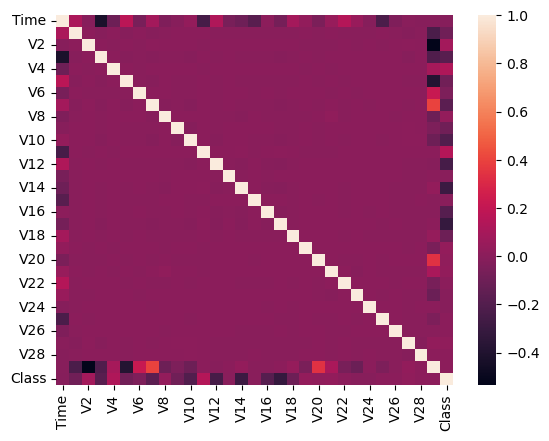

In [6]:
sns.heatmap(credit_df.corr())

In [7]:
credit_df['Class'].value_counts()#values

0    283253
1       473
Name: Class, dtype: int64

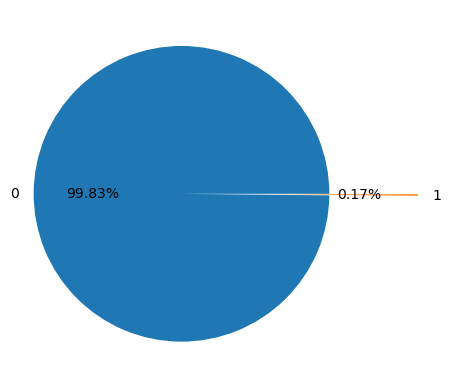

In [8]:
plt.pie(credit_df['Class'].value_counts(), labels=credit_df['Class'].unique(), autopct="%.2f%%", explode=[0.5, 0.1], shadow=False)
plt.show()#values percentages distribution 

<Axes: xlabel='Class', ylabel='count'>

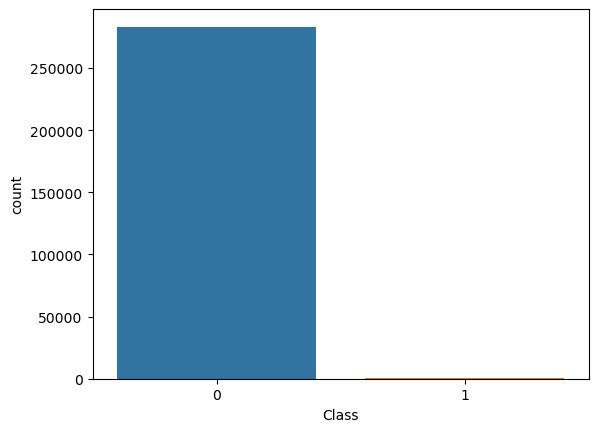

In [9]:
sns.countplot(credit_df, x='Class')#class distributions

In [10]:
credit_df[['Amount', 'Class']].describe().T

,count,mean,std,min,25%,50%,75%,max
Amount,283726.0,88.472687,250.399437,0.0,5.6,22.0,77.51,25691.16
Class,283726.0,0.001667,0.040796,0.0,0.0,0.0,0.00,1.00


In [11]:
fraud = credit_df[credit_df['Class'] == 1] 
valid = credit_df[credit_df['Class'] == 0] 
outlierFraction = len(fraud)/float(len(valid)) 
print(outlierFraction) 
print('Fraud Cases: {}'.format(len(credit_df[credit_df['Class'] == 1]))) 
print('Valid Transactions: {}'.format(len(credit_df[credit_df['Class'] == 0]))) 

0.0016698852262818046
Fraud Cases: 473
Valid Transactions: 283253


In [12]:
fraud.Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [13]:
valid.Amount.describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

# SPLITTING, SCALLING AND MODELLING

In [14]:
X = credit_df.drop('Class', axis=1)
X.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69


In [15]:
y = credit_df.Class
y.tail(2)

284805    0
284806    0
Name: Class, dtype: int64

In [16]:
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X))
X.head(3)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-1.996823,-0.701082,-0.041687,1.680101,0.976623,-0.247020,0.348012,0.193700,0.084434,0.333534,...,0.326273,-0.024777,0.383483,-0.177444,0.110157,0.247059,-0.392622,0.333033,-0.065850,0.244200
1,-1.996823,0.608792,0.164138,0.109279,0.318998,0.042258,-0.060980,-0.065656,0.072903,-0.231703,...,-0.089963,-0.311372,-0.881454,0.162081,-0.561503,0.321175,0.260854,-0.027154,0.043219,-0.342584
2,-1.996802,-0.700336,-0.811337,1.174270,0.270648,-0.366756,1.352655,0.643223,0.210788,-1.381169,...,0.681564,0.343094,1.065068,1.457772,-1.138484,-0.628161,-0.288861,-0.144325,-0.183824,1.158900


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((190096, 30), (93630, 30), (190096,), (93630,))

In [21]:
logistic_model = LogisticRegression() #logistic model
logistic_model.fit(X_train, y_train)

predictions = logistic_model.predict(X_test)
acc = accuracy_score(y_test, predictions)
loss = mean_absolute_error(y_test, predictions)
print(f"ACCURACY: {acc}\nLOSS: {loss}")

ACCURACY: 0.9991562533376055
LOSS: 0.0008437466623945316


In [31]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

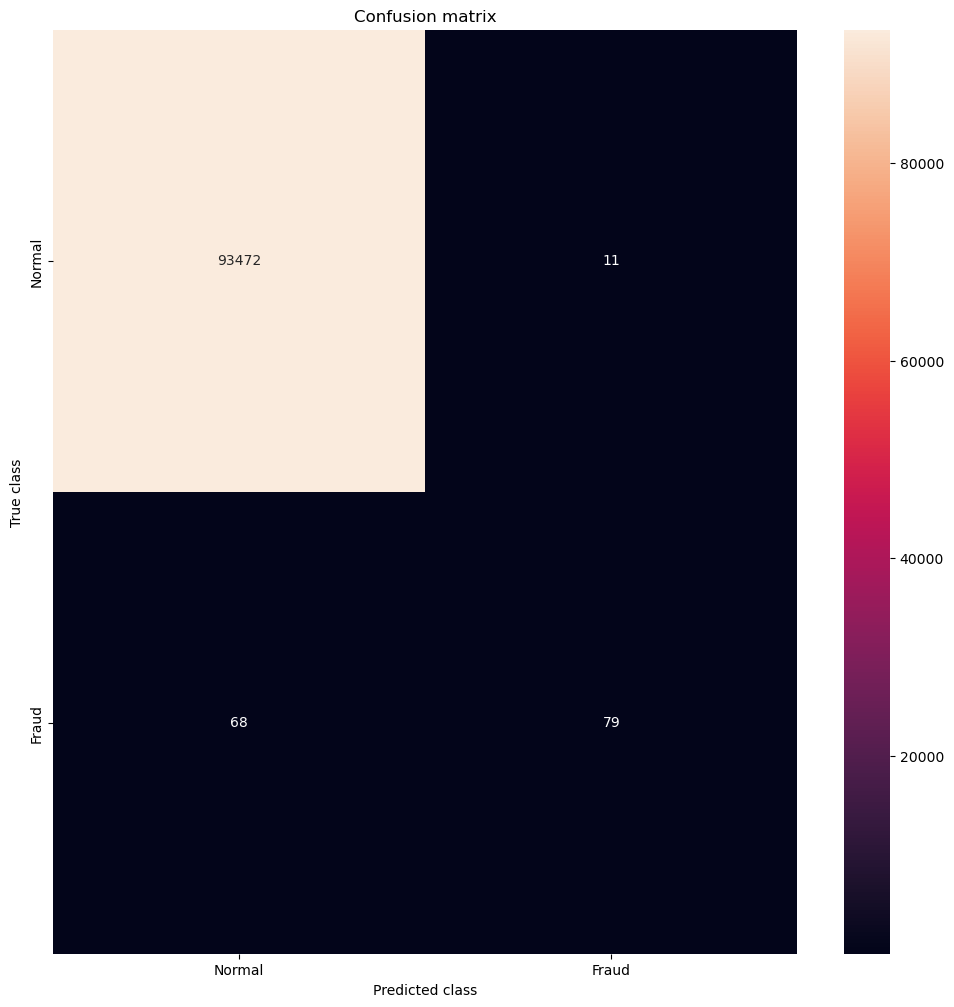

In [26]:
Labels = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(y_test, predictions) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = Labels,  
            yticklabels = Labels, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

In [27]:
rep = classification_report(y_test, predictions)
print(rep)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93483
           1       0.88      0.54      0.67       147

    accuracy                           1.00     93630
   macro avg       0.94      0.77      0.83     93630
weighted avg       1.00      1.00      1.00     93630



In [28]:
prec = precision_score(y_test, predictions) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(y_test, predictions) 
print("The recall is {}".format(rec)) 

The precision is 0.8777777777777778
The recall is 0.5374149659863946


In [32]:
LDA_model = LinearDiscriminantAnalysis() #LDA model
LDA_model.fit(X_train, y_train)

LDA_pred = LDA_model.predict(X_test)
acc = accuracy_score(y_test, LDA_pred)
loss = mean_absolute_error(y_test, LDA_pred)
print(f"ACCURACY: {acc}\nLOSS: {loss}")

ACCURACY: 0.9994446224500694
LOSS: 0.0005553775499305778


In [33]:
LDA_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

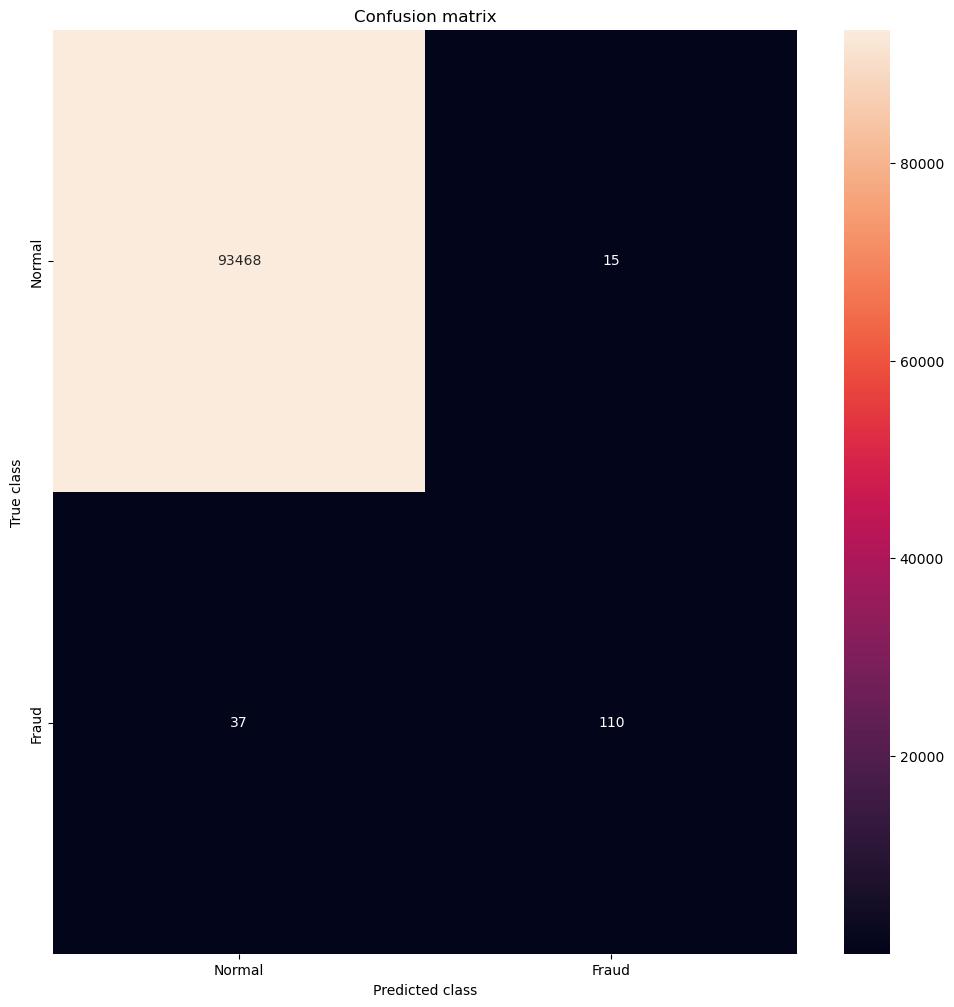

In [34]:
Labels = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(y_test, LDA_pred) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = Labels,  
            yticklabels = Labels, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

In [35]:
rep = classification_report(y_test, LDA_pred)
print(rep)

prec = precision_score(y_test, LDA_pred) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(y_test, LDA_pred) 
print("The recall is {}".format(rec)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93483
           1       0.88      0.75      0.81       147

    accuracy                           1.00     93630
   macro avg       0.94      0.87      0.90     93630
weighted avg       1.00      1.00      1.00     93630

The precision is 0.88
The recall is 0.7482993197278912


we can keep on trying other models to improve the recall and precision. But in this case the discriminant_analysis seems to perform better than the logistic model.